In [20]:
# ----------------------------------------------------------------------
# LAB: ASSOCIATION RULE MINING USING APRIORI & FP-GROWTH
# Dataset: netflix_titles.csv
# Student: Prasanna Adhikari
# Course: Lab 6: Association Rule Mining with Apriori and FP-Growth
# Assignment: Association Rule Mining Lab
# ---------------------------------------------------------------------


In [17]:
# ============================
# Step 1: DATA PREPARATION
# ============================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Load the Netflix dataset
df = pd.read_csv("netflix_titles.csv")

# Display dataset structure
print("Dataset Columns:", df.columns)
print(df.head())

Dataset Columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

       

In [18]:
# --- Data Cleaning ---
# Use only the 'listed_in' column (genres) for transactional items
df_clean = df[['show_id', 'listed_in']].dropna()

# Convert genre strings into list items (transactions)
df_clean['listed_in'] = df_clean['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])

# Show sample transactions
print("\nSample Transactions:")
print(df_clean['listed_in'].head())


Sample Transactions:
0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: listed_in, dtype: object


In [19]:

# --- Transaction Encoding ---
# Convert list of genres into one-hot encoded format for Apriori & FP-Growth
te = TransactionEncoder()
transactions = te.fit_transform(df_clean['listed_in'])
df_trans = pd.DataFrame(transactions, columns=te.columns_)

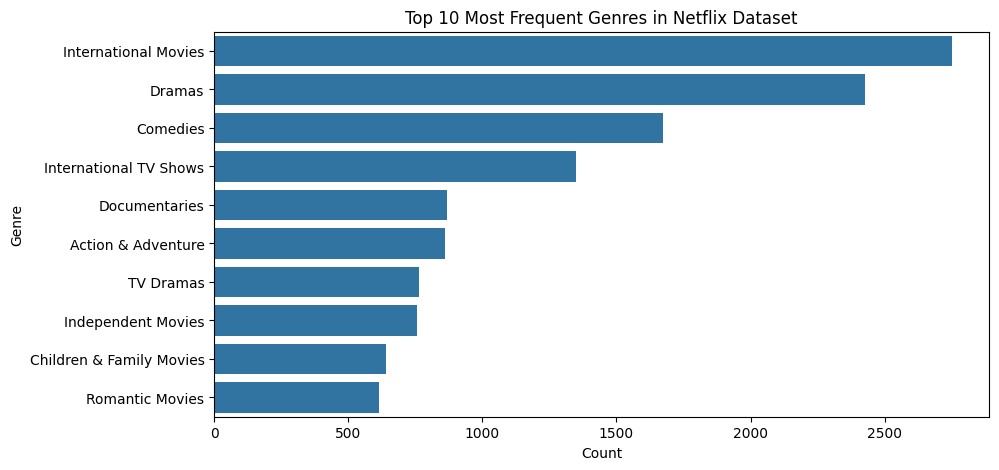

In [16]:
# --- Visualization ---
# Count top genres
genre_counts = df_clean['listed_in'].explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Most Frequent Genres in Netflix Dataset")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [9]:
# ============================
# Step 2: APRIORI ALGORITHM
# ============================

# Generate frequent itemsets using Apriori
frequent_apriori = apriori(df_trans, min_support=0.05, use_colnames=True)

print("\nApriori Frequent Itemsets:")
print(frequent_apriori.head())


Apriori Frequent Itemsets:
    support                    itemsets
0  0.097536        (Action & Adventure)
1  0.072783  (Children & Family Movies)
2  0.190076                  (Comedies)
3  0.053367            (Crime TV Shows)
4  0.098672             (Documentaries)


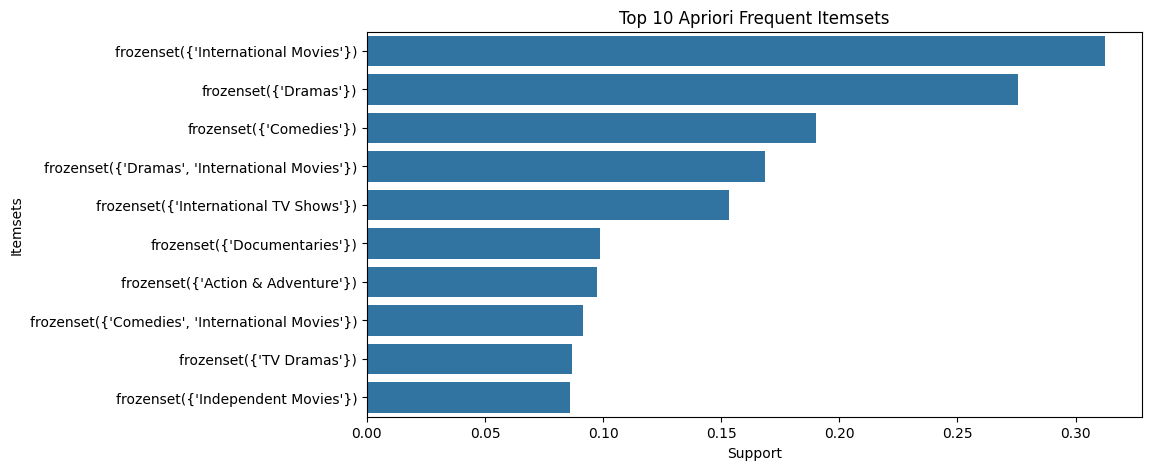

In [10]:
# Visualization of top itemsets
top_ap = frequent_apriori.nlargest(10, "support")

plt.figure(figsize=(10,5))
sns.barplot(x=top_ap["support"], y=top_ap["itemsets"].astype(str))
plt.title("Top 10 Apriori Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

In [11]:
# ============================
# Step 3: FP-GROWTH ALGORITHM
# ============================

# Generate frequent itemsets using FP-Growth
frequent_fpgrowth = fpgrowth(df_trans, min_support=0.05, use_colnames=True)

print("\nFP-Growth Frequent Itemsets:")
print(frequent_fpgrowth.head())


FP-Growth Frequent Itemsets:
    support                  itemsets
0  0.098672           (Documentaries)
1  0.153401  (International TV Shows)
2  0.086636               (TV Dramas)
3  0.053367          (Crime TV Shows)
4  0.065970             (TV Comedies)


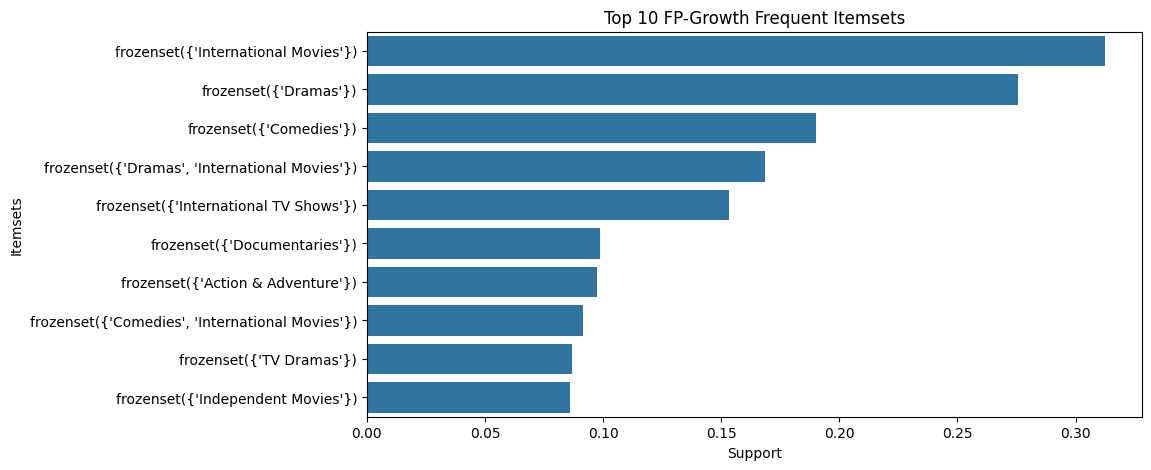

In [12]:
# Visualization of top itemsets
top_fp = frequent_fpgrowth.nlargest(10, "support")

plt.figure(figsize=(10,5))
sns.barplot(x=top_fp["support"], y=top_fp["itemsets"].astype(str))
plt.title("Top 10 FP-Growth Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

In [13]:

# ============================
# Step 4: ASSOCIATION RULES
# ============================

# Generate association rules (using Apriori itemsets)
rules = association_rules(frequent_apriori, metric="confidence", min_threshold=0.5)

print("\nAssociation Rules (Apriori):")
print(rules[['antecedents','consequents','support','confidence','lift']].head())


Association Rules (Apriori):
              antecedents               consequents   support  confidence  \
0    (Independent Movies)                  (Dramas)  0.066765    0.777778   
1                (Dramas)    (International Movies)  0.168389    0.611042   
2  (International Movies)                  (Dramas)  0.168389    0.538881   
3             (TV Dramas)  (International TV Shows)  0.058363    0.673657   

       lift  
0  2.822369  
1  1.955469  
2  1.955469  
3  4.391483  


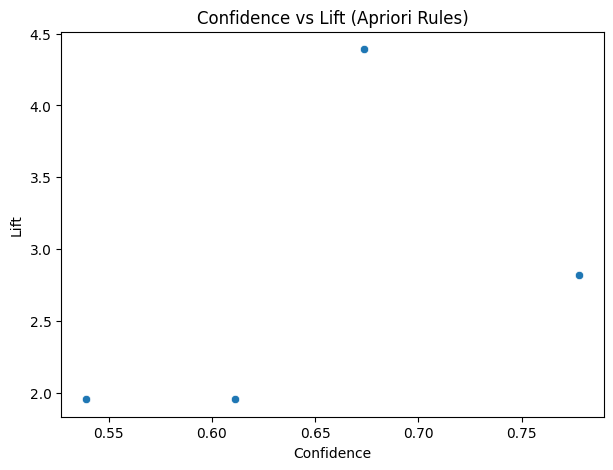

In [14]:
# Visualization: Confidence vs Lift
plt.figure(figsize=(7,5))
sns.scatterplot(data=rules, x="confidence", y="lift")
plt.title("Confidence vs Lift (Apriori Rules)")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

#Step 5
##Comparative Analysis

The comparative analysis of Apriori and FP-Growth on the Netflix Titles dataset highlights both the strengths and limitations of each algorithm when applied to genre-based transactional data. Since the dataset is not a traditional market-basket dataset, the listed_in column was transformed into genre transactions, enabling both algorithms to identify meaningful patterns. Apriori generated 19 frequent itemsets, the same number produced by FP-Growth, showing consistent outcomes across both methods. However, FP-Growth achieved these results more efficiently due to its ability to compress transactional data into an FP-tree, minimizing repeated database scans. In contrast, Apriori relies heavily on candidate generation, which becomes slower as item combinations grow.

Despite having identical support thresholds, the itemsets discovered by each approach were similar, with genres such as Documentaries, International TV Shows, TV Dramas, and Crime TV Shows appearing frequently. Apriori’s association rules showed strong relationships, such as between Independent Movies → Dramas with high confidence and lift, revealing meaningful genre co-occurrence patterns.

A key challenge was adapting the Netflix dataset into a transactional format since it does not inherently contain purchase-style records. Preprocessing the listed_in field resolved this limitation. Overall, FP-Growth proved faster and more scalable, while Apriori provided clearer rule-generation transparency.